In [3]:
import pickle
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
from statistics import stdev
from math import log
import numpy as np
from scipy import stats
from statistics import mean
%matplotlib inline


In [23]:
price_100_stan = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Initial\\Standard\\stan_total_price.p","rb"))
price_100_net = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\one level\\total_price_10_policy_better.p", "rb"))
price_100_net_g = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\Results\\Common Resource\\multiple levels\\total_price_ging10_policy_better.p", "rb"))
price_100_net_5 = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\one level\\total_price_5_policy_better.p", "rb"))
price_100_net_5_g = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\Results\\Common Resource\\multiple levels\\total_price_ging5_policy_better.p", "rb"))


In [18]:
from collections import defaultdict

def make_distro(price_100):
    all_stds =[]
    total_log = defaultdict(list)
    for run, output in price_100.items(): 
        for step, prices in output.items():
            log_pr = [log(p) for p in prices]
            if len(log_pr) <2: 
                pass       
            else:     
                out = stdev(log_pr)
                total_log[run].append(out) 
                all_stds.append(out)
    return all_stds




In [19]:
price_stan = make_distro(price_100_stan)
price_net = make_distro(price_100_net)
price_net_g = make_distro(price_100_net_g)
price_net_5 = make_distro(price_100_net_5)
price_net_5_g = make_distro(price_100_net_5_g)

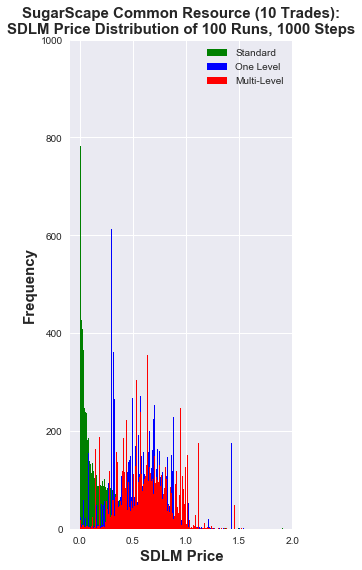

In [22]:
fig, ax = plt.subplots(figsize = (4,9))
ax.hist(price_stan, 500, label = "Standard", color ='green')
ax.hist(price_net, 500, label = "One Level", color='blue')
ax.hist(price_net_g, 500, label = "Multi-Level", color = 'red')


plt.title("SugarScape Common Resource (10 Trades):\nSDLM Price Distribution of 100 Runs, 1000 Steps",\
          fontsize = 15, fontweight = "bold")
plt.xlabel("SDLM Price", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
#plt.xlim(.75,2)
plt.ylim(0,1000)
plt.legend()

In [12]:
## Calculate price

In [24]:
ind_stan = price_100_stan["Run42"]
ind_net = price_100_net["Run42"]
ind_net_g = price_100_net_g["Run42"]

In [25]:
def ind_price(ind_e):
    x = []
    y =[]
    for st, pr in ind_e.items(): 
        #if step <=400: 
            x.append(st)
            y.append(gmean(pr))
    return (x,y)
        


In [26]:
x_s, y_s = ind_price(ind_stan)
x_b, y_b = ind_price(ind_net_g)
x_n, y_n = ind_price(ind_net)

(0, 4)

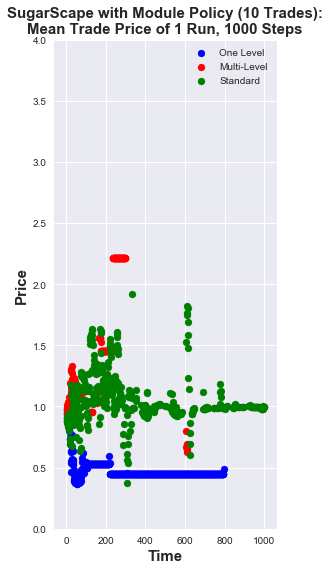

In [27]:
fig, ax = plt.subplots(figsize = (4,9))
ax.scatter(x_n, y_n, label = "One Level", color='blue')
ax.scatter(x_b,y_b, label = "Multi-Level", color = 'red')
ax.scatter(x_s,y_s, label = "Standard", color ='green')
plt.title("SugarScape with Module Policy (10 Trades):\nMean Trade Price of 1 Run, 1000 Steps",\
          fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Price", fontsize = 15, fontweight = "bold")
plt.legend()
plt.ylim(0,4)

In [28]:
def ind_volume(ind_e):
    x_vol = []
    y_vol = []
    total = 0
    for s, p in ind_e.items(): 
        #if step <=400:

            x_vol.append(s)
            y_vol.append(len(p))
            total += len(p)
    return (x_vol, y_vol, total)

In [29]:
x_vol_stan, y_vol_stan, stan_vol = ind_volume(ind_stan)
x_vol_net_g, y_vol_net_g, net_g_vol = ind_volume(ind_net_g)
x_vol_net, y_vol_net, net_vol = ind_volume(ind_net)

In [30]:
len(y_vol_stan)

443

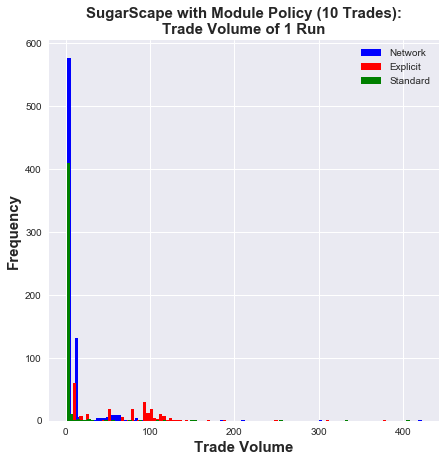

In [31]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.hist(y_vol_net, 100, label = "Network", color='blue')
ax2.hist(y_vol_net_g, 100, label = "Explicit", color = 'red')
ax2.hist(y_vol_stan, 100, label = "Standard", color ='green')
plt.title("SugarScape with Module Policy (10 Trades):\nTrade Volume of 1 Run",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Trade Volume", fontsize = 15, fontweight = "bold")
plt.ylabel("Frequency", fontsize = 15, fontweight = "bold")
plt.legend()

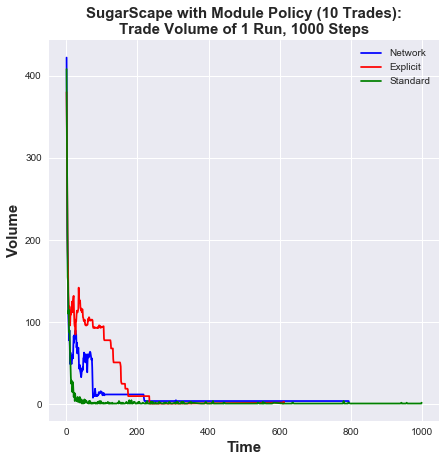

In [32]:
fig2, ax2 = plt.subplots(figsize = (7,7))
ax2.plot(x_vol_net, y_vol_net, label = "Network", color='blue')
ax2.plot(x_vol_net_g, y_vol_net_g, label = "Explicit", color = 'red')
ax2.plot(x_vol_stan, y_vol_stan, label = "Standard", color ='green')
plt.title("SugarScape with Module Policy (10 Trades):\nTrade Volume of 1 Run, 1000 Steps",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Volume", fontsize = 15, fontweight = "bold")
#ax2.text(600,300, "Total Trade Volume: \n "+str(total), fontsize = 15, fontweight = 'bold')
#plt.ylim(0,400)
plt.legend()

In [33]:

def sdlm(ind_e):
    x_dev =[]
    y_dev = []
    x_all = []
    y_all = []
    log_prices = {}
    for step, prices in ind_e.items(): 
        log_prices[step] = [log(p) for p in prices]
    for step, log_p in log_prices.items(): 
        #if step <= 400: 


            if len(log_p) <2: 
                pass       
            else: 
                for each in log_p: 
                    x_all.append(step)
                    y_all.append(each)

                x_dev.append(step)
                y_dev.append(stdev(log_p))
    return (x_dev, y_dev, x_all, y_all)
    


In [35]:
x_dev_stan, y_dev_stan, x_all_stan, y_all_stan = sdlm(ind_stan)
x_dev_net_g, y_dev_net_g, x_all_net_g, y_net_g = sdlm(ind_net_g)
x_dev_net, y_dev_net, x_all_net, y_all_net = sdlm(ind_net)


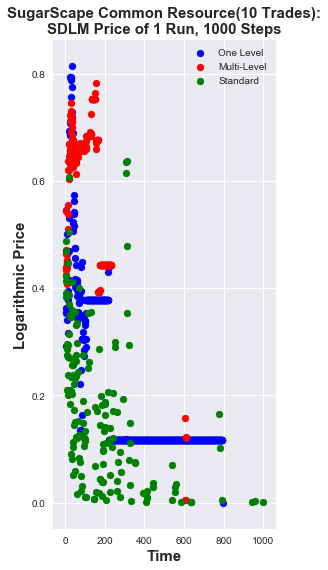

In [36]:
#from numpy.polynomial.polynomial import polyfit
fig3, ax3 = plt.subplots(figsize=(4,9))
ax3.scatter(x_dev_net, y_dev_net, label = "One Level", color='blue')
ax3.scatter(x_dev_net_g, y_dev_net_g, label = "Multi-Level", color = 'red')
ax3.scatter(x_dev_stan, y_dev_stan, label = "Standard", color ='green')
#ax3.scatter(x_all_brute, y_all_brute, color = 'red')
#ax3.scatter(x_all_stan, y_all_stan, color = 'green')
plt.title("SugarScape Common Resource(10 Trades):\nSDLM Price of 1 Run, 1000 Steps",\
            fontsize = 15, fontweight = "bold")
plt.xlabel("Time", fontsize = 15, fontweight = "bold")
plt.ylabel("Logarithmic Price", fontsize = 15, fontweight = "bold")
plt.legend()


In [37]:
stan_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Initial\\Standard\\stan_multi_sur.p", "rb"))
stan_multi_t = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Initial\\Standard\\stan_multi_time.p", "rb"))
net_multi_s = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\one level\\net_multi_sur_10_policy_better.p", "rb"))
net_multi_t =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\one level\\net_multi_time_10_policy_better.p", "rb"))
net_multi_s_g = pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\multiple levels\\net_multi_sur_ging10_policy_better.p", "rb"))
net_multi_t_g =pickle.load(open("C:\\Users\\ymamo\\Google Drive\\1. PhD\\Dissertation\\SugarScape\\Results\\Common Resource\\multiple levels\\net_multi_time_ging10_policy_better.p", "rb"))
net_mean = mean(net_multi_s)
net_g_mean = mean(net_multi_s_g)
stan_mean = mean(stan_multi_s)
net_time = round(mean(net_multi_t),2)
net_g_time = round(mean(net_multi_t_g),2)
stan_time = round(mean(stan_multi_t),2)


In [38]:

t2,  p2 = stats.ttest_ind(net_multi_s,net_multi_s_g)
net_p = p2 * 2
#t3, p3 = stats.ttest_ind(net_multi_s[0:35], stan_multi_s[0:35])
#alt_p = round(p3 *2, 8)
print ("Net-Stan t_test: ", net_p)
#print ("Explixit_Stan t_test: ",brute_p)


Net-Stan t_test:  1.84493788541


Text(0,0.5,'Frequency')

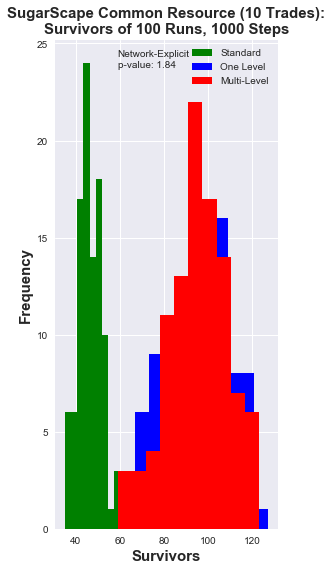

In [41]:
fig5, ax5 = plt.subplots(figsize=(4,9))
plt.hist(stan_multi_s, label = "Standard", color = 'green')
plt.hist(net_multi_s, label = "One Level", color = 'blue')
plt.hist(net_multi_s_g, label = "Multi-Level", color = 'red')

plt.text(59, 23.8, "Network-Explicit\np-value: " + str(round(net_p,2)))
plt.legend(loc=1)
plt.title("SugarScape Common Resource (10 Trades):\nSurvivors of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.xlabel("Survivors", fontweight = "bold", fontsize = 15)
plt.ylabel('Frequency', fontweight = "bold", fontsize = 15)

In [44]:
t, p = stats.ttest_ind(stan_multi_t,net_multi_t_g)
brute_t_p = (p * 2,10)
t2,  p2 = stats.ttest_ind(stan_multi_t,net_multi_t)
net_t_p = (p2 * 2, 10)
brute_t_p, net_t_p

((8.0416467935251997e-69, 10), (1.255145423536493e-63, 10))

Text(0,0.5,'Frequency')

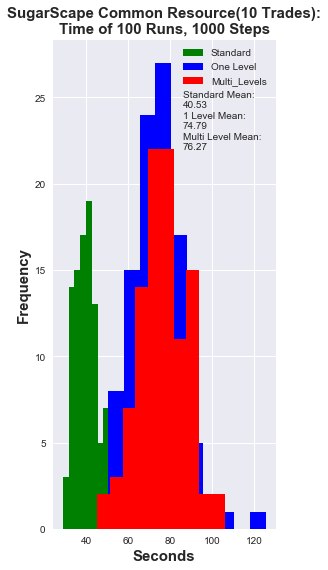

In [52]:
fig6, ax6 = plt.subplots(figsize=(4,9))
plt.hist(stan_multi_t, label = "Standard", color ='green')
plt.hist(net_multi_t, label = "One Level", color = 'blue')
plt.hist(net_multi_t_g, label = "Multi_Levels", color = 'red')

#plt.text(78, 25, "Network p-value: "+str(net_t_p) +"\nExplicit p-value: "+str(brute_t_p))
plt.legend()
plt.title("SugarScape Common Resource(10 Trades):\nTime of 100 Runs, 1000 Steps", fontweight = "bold", fontsize = 15)
plt.text(86, 22, "\nStandard Mean:\n"+str(stan_time) + "\n1 Level Mean:\n"+str(net_time) +"\nMulti Level Mean:\n"+str(net_g_time))
plt.xlabel("Seconds", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency", fontweight = "bold", fontsize = 15)

## Type Analysis

In [67]:
net_type_df = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_Elegant\\type_df_10_policy.p", "rb"))
brute_type_df =pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_Brute\\brute_type_df_10_policy.p", "rb"))
net_type_df_5 = pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_Elegant\\type_df_5_policy.p", "rb"))
brute_type_df_5 =pickle.load(open("C:\\Users\\ymamo\Google Drive\\1. PhD\\Dissertation\\SugarScape\\NetScape_Brute\\brute_type_df_5_policy.p", "rb"))

In [68]:
def meta_plots(df):  
    consolidated = {}
    for run, steps in df.items():
        low_agents = []
        mid_agents = []
        high_agents = []
        indies = [] 
        for step, counts in steps.items(): 
            lows = 0
            highs = 0
            mids = 0
            for subs in counts[0]:
                if subs[1] == 'low focus':
                    lows += subs[2]
                elif subs[1] == "high focus":
                    highs += subs[2]
                elif subs[1] == "aggregate":
                    mids += subs[2]
            low_agents.append(lows)
            mid_agents.append(mids)
            high_agents.append(highs)      
            indies.append(counts[1])
        consolidated[run] = [low_agents, mid_agents, high_agents, indies]
    
    return consolidated

In [69]:
net_type_con = meta_plots(net_type_df)
brute_type_con = meta_plots(brute_type_df)
net_type_con_5 = meta_plots(net_type_df_5)
brute_type_con_5 = meta_plots(brute_type_df_5)


In [70]:

def type_hist(dict_type):
    high = []
    mid = []
    low = []
    inds = []
    for run, res in dict_type.items(): 
        high.append(res[0][-1])
        mid.append(res[1][-1])
        low.append(res[2][-1])
        inds.append(res[3][-1])
    return high, mid, low, inds
x = [i for i in range (100)]

In [71]:
net_5_h, net_5_mid, net_5_low, net_5_inds = type_hist(net_type_con_5)
net_10_h, net_10_mid, net_10_low, net_10_inds = type_hist(net_type_con)
b_5_h, b_5_mid, b_5_low, b_5_inds = type_hist(brute_type_con_5)
b_10_h, b_10_mid, b_10_low, b_10_inds = type_hist(brute_type_con)

Text(0,0.5,'Frequency of Type')

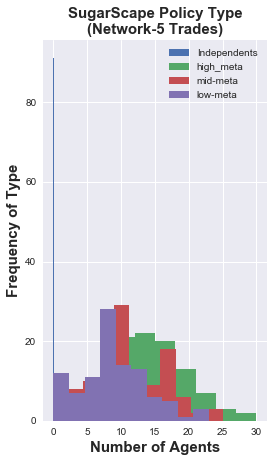

In [72]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(net_5_inds, label = 'Independents')
plt.hist(net_5_h, label = 'high_meta')
plt.hist(net_5_mid, label = 'mid-meta')
plt.hist(net_5_low, label = 'low-meta')

plt.title("SugarScape Policy Type\n(Network-5 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)

Text(0,0.5,'Frequency of Type')

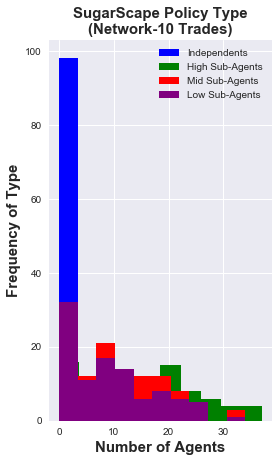

In [74]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(net_10_inds, label = 'Independents', color = "blue")
plt.hist(net_10_h, label = 'High Sub-Agents', color = 'green')
plt.hist(net_10_mid, label = 'Mid Sub-Agents', color = 'red')
plt.hist(net_10_low, label = 'Low Sub-Agents', color = 'purple')

plt.title("SugarScape Policy Type\n(Network-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)

Text(0,0.5,'Frequency of Type')

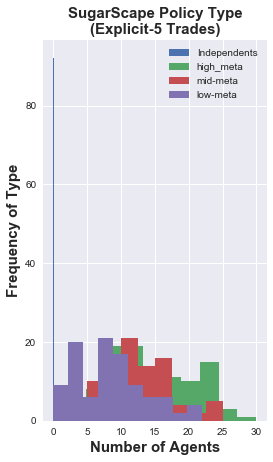

In [57]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(b_5_inds, label = 'Independents')
plt.hist(b_5_h, label = 'high_meta')
plt.hist(b_5_mid, label = 'mid-meta')
plt.hist(b_5_low, label = 'low-meta')

plt.title("SugarScape Policy Type\n(Explicit-5 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)

Text(0,0.5,'Frequency of Type')

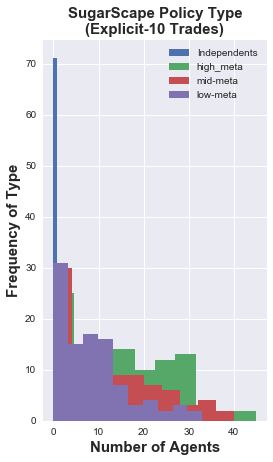

In [58]:
fig7, ax7 = plt.subplots(figsize=(4,7))

plt.hist(b_10_inds, label = 'Independents')
plt.hist(b_10_h, label = 'high_meta')
plt.hist(b_10_mid, label = 'mid-meta')
plt.hist(b_10_low, label = 'low-meta')

plt.title("SugarScape Policy Type\n(Explicit-10 Trades)", fontweight = "bold", fontsize = 15)
plt.legend()
plt.xlabel("Number of Agents", fontweight = "bold", fontsize = 15)
plt.ylabel("Frequency of Type", fontweight = "bold", fontsize = 15)